### Дополнительное задание 1

Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p). Подробнее в материалах лекции.
Построить графики зависимости FPR от длинны строк L и простого модуля p.
Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел p из интервала (100, 1000)
Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.

In [2]:
import numpy as np
from math import log, e, sqrt
from bitarray import bitarray
from tqdm import tqdm_notebook
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
def hash_int(x, a=112, b=22, p=997):
    return (a*x + b) % 997

In [4]:
def poly_hash(s, p, x=31):
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return h

In [5]:
import random

In [6]:
L = np.linspace(10, 100, 11)
print(L)

[ 10.  19.  28.  37.  46.  55.  64.  73.  82.  91. 100.]


In [26]:
def prime(lower=100, upper=1000):
    prime = []
    for val in range(lower, upper + 1): 
        if val > 1: 
            for n in range(2, val): 
                if (val % n) == 0: 
                    break
            else: 
                prime.append(val)

    return random.sample(prime, 10)

In [28]:
inter = prime()
inter

[211, 421, 619, 907, 743, 937, 593, 317, 131, 449]

In [94]:
def rand_str(seed, L):
    strings = []
    np.random.RandomState(seed=seed)
    for i in range(1000):
        strings.append(''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for i in range(int(L))))
    return strings

In [35]:
seeds = random.sample(range(1001), 11)
seeds

[578, 153, 610, 240, 796, 218, 433, 34, 483, 911, 464]

In [112]:
def fpr(p, l, seed):
    col = 0
    hashes = {}
    st = rand_str(seed, int(l))
#     print(st)
    for s in st:
        h = hash_int(poly_hash(s, p))
        if h not in hashes:
            hashes[h] = s
        else:
            hashes[h] = s
            col += 1
#         print(hashes)
    return col * 2 / (1000 * 999)  
                

#### фиксируем р

In [113]:
p = random.choice(inter)
print('p = ', p)

p =  449


In [114]:
p_mean = []
p_std = []
for l in L:
    f = []
    for seed in seeds:
        fpr_ = fpr(p, l, seed)
#         print(fpr_)
        f.append(fpr_)
    p_mean.append(np.mean(f))
    p_std.append(np.std(f))

In [115]:
p_mean[:10]

[0.0011973791973791973,
 0.0011999271999271997,
 0.0011977431977431977,
 0.0011986531986531988,
 0.0012041132041132041,
 0.0012013832013832012,
 0.001199017199017199,
 0.0011975611975611976,
 0.0011999271999272,
 0.0012017472017472018]

In [116]:
p_std[:10]

[9.251626191383251e-06,
 7.60055073903763e-06,
 1.8210934936899045e-05,
 1.4935108373048393e-05,
 6.521602645252126e-06,
 8.640697039198667e-06,
 1.2176342658060028e-05,
 1.0448776117504666e-05,
 1.3612348312905768e-05,
 9.811143486718395e-06]

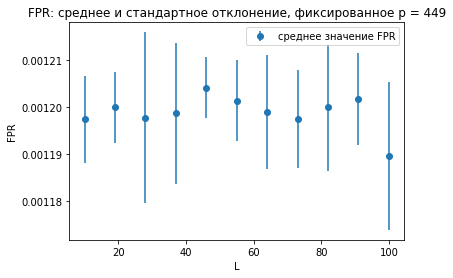

In [117]:
plt.errorbar(L, p_mean, p_std, fmt='o', label='среднее значение FPR')
plt.title('FPR: среднее и стандартное отклонение, фиксированное p = %d' % p)
plt.xlabel('L')
plt.ylabel('FPR')
plt.legend()
plt.show()

На графике видно, что функция растет линейно только на некоторых участках, поэтому ожидания не оправдались

#### фиксируем L

In [118]:
l = int(random.choice(L))
print('l = ', l)

l =  73


In [119]:
l_mean = []
l_std = []
f_ = []
for p in inter:
    for seed in seeds[:-1]:
        fpr_ = fpr(p, l, seed)
        f_.append(fpr_)
    l_mean.append(np.mean(f_))
    l_std.append(np.std(f_))
    

In [120]:
l_mean[:10]

[0.0015833833833833835,
 0.0014125125125125123,
 0.0012759426092759428,
 0.001155055055055055,
 0.0011045445445445445,
 0.0010491157824491157,
 0.0010472186472186473,
 0.0010905905905905905,
 0.001162740518296074,
 0.0011663263263263263]

In [121]:
l_std[:10]

[2.7522977146881777e-06,
 0.00017115240869136113,
 0.0002386211335421125,
 0.00029434840806376723,
 0.000282145385983263,
 0.00028585335072315796,
 0.0002647214135974337,
 0.000272930499622506,
 0.0003284192595861226,
 0.00031176001317893354]

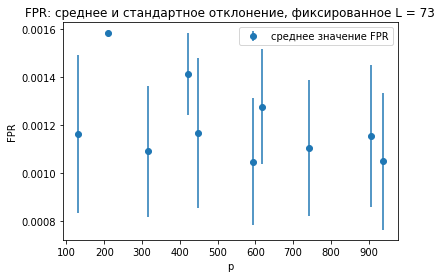

In [122]:

plt.errorbar(inter, l_mean, l_std, fmt='o', label='среднее значение FPR')
plt.title('FPR: среднее и стандартное отклонение, фиксированное L = %d' % l)
plt.xlabel('p')
plt.ylabel('FPR')
plt.legend()
plt.show()

На данном графике видно, что ожидание уменьшения коллизий с ростом р не оправдалось. Скорее всего, проблема в коде, но этого найти не удалось